> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Soccer  (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


# <a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

>  **Done** loaded Player_attributes, Player, Team, Team_attributes

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df_players_attributes= pd.read_csv('Player_Attributes.csv')
df_players_attributes.info()

#   types and look for instances of missing or possibly errant data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [3]:
df_players_attributes.shape

(183978, 42)

In [4]:
df_players_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df_players = pd.read_csv('Player.csv')
df_players.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [6]:
df_players.shape

(11060, 7)

In [7]:
df_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
df_team = pd.read_csv('Team.csv')
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [9]:
df_team.shape

(299, 5)

In [10]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [11]:
df_team_attributes = pd.read_csv('Team_Attributes.csv')

In [12]:
df_team_attributes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [13]:
df_team_attributes.shape

(1458, 25)

In [14]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [15]:
## check for duplicates

In [16]:
df_players.duplicated().sum()

0

In [17]:
df_team.duplicated().sum()

0

In [18]:
df_players_attributes.duplicated().sum()

0

In [19]:
df_team_attributes.duplicated().sum()

0

In [20]:
## checked for features with missing values

In [21]:
df_players_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [22]:
df_team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [23]:
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [24]:
df_players.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [25]:
df_players.player_api_id.nunique()

11060

In [26]:
df_players_attributes.player_api_id.nunique()

11060

In [27]:
df_players_attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [28]:
df_players.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [29]:
## merge df_players_attributes to df_players to a new dataframe named df_player_ratings

In [30]:
df_player_ratings = pd.merge(df_players_attributes,
                             df_players[[
                                 'id', 'player_api_id', 'player_name',
                                 'player_fifa_api_id', 'birthday', 'height',
                                 'weight'
]],
                             on='player_api_id')


In [31]:
df_player_ratings

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,20.0,84.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [32]:
df_player_ratings.shape

(183978, 48)

In [33]:
df_player_ratings.isnull().sum()

id_x                       0
player_fifa_api_id_x       0
player_api_id              0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength                 836
long_shots               836
aggression               836
interceptions            836
positioning              836
vision                  2713
penalties                836
marking       

In [34]:
## check for duplicates in player_ratings by player names

In [35]:
df_player_ratings.player_name.duplicated().sum()

173130

In [36]:
df_player_ratings.drop_duplicates(
    subset=['player_api_id'])


,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,7.0,9.0,9.0,12.0,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,11.0,12.0,9.0,13.0,3,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,12.0,13.0,12.0,11.0,4,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,6.0,16.0,12.0,11.0,5,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,183925,2488,26357,2015-03-06 00:00:00,73.0,73.0,right,low,medium,42.0,...,10.0,11.0,8.0,12.0,11071,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
183937,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,8.0,5.0,5.0,8.0,11072,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
183953,183954,111191,36491,2011-02-22 00:00:00,68.0,73.0,left,NaN,_0,64.0,...,13.0,5.0,6.0,6.0,11073,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
183960,183961,47058,35506,2011-02-22 00:00:00,67.0,78.0,right,NaN,_0,48.0,...,7.0,15.0,10.0,12.0,11074,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [37]:
df_player_ratings.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [38]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


> **Discussion**: The data sets are Player_attributes, Player, Team, Team_attributes 


In [39]:
## The structure of the data is that it needs to be
## drop extraneous Columns

In [40]:
df_team.drop(['team_fifa_api_id',], axis=1, inplace=True)
# Confirmation
df_team.head()


,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB


In [41]:
df_team_attributes.drop(['buildUpPlayDribbling'], axis=1, inplace=True)
# Confirmation
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Top 5 players by overall score


In [42]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Top 5 players by score


In [43]:
df_players_attributes['overall_rating'].value_counts()

68.0    10492
69.0    10281
67.0    10198
66.0    10112
70.0    10028
        ...  
38.0        8
35.0        5
37.0        3
36.0        3
33.0        2
Name: overall_rating, Length: 61, dtype: int64

In [44]:
df_players_attributes.describe().overall_rating

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [45]:
df_player_ratings.sort_values(by=['overall_rating'],ascending=False)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102491,102492,158023,30981,2014-04-25 00:00:00,94.0,97.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102492,102493,158023,30981,2013-11-15 00:00:00,94.0,97.0,left,high,medium,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102494,102495,158023,30981,2013-03-22 00:00:00,94.0,97.0,left,high,medium,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,182588,116368,25538,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10983,Youssouf Hadji,116368,1980-02-25 00:00:00,182.88,172
183249,183250,139865,32633,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11025,Zbigniew Malkowski,139865,1978-01-19 00:00:00,187.96,181
183309,183310,141272,33823,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11029,Zdenek Pospech,141272,1978-12-14 00:00:00,175.26,159
183361,183362,168650,25772,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11030,Zdravko Kuzmanovic,168650,1987-09-22 00:00:00,185.42,176


In [46]:
df_player_ratings.sort_values(by=['overall_rating'], ascending=False).head(5)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102491,102492,158023,30981,2014-04-25 00:00:00,94.0,97.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102492,102493,158023,30981,2013-11-15 00:00:00,94.0,97.0,left,high,medium,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102494,102495,158023,30981,2013-03-22 00:00:00,94.0,97.0,left,high,medium,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


In [47]:
#check df_player_ratings date column date is an object

In [48]:
df_player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_x                  183978 non-null  int64  
 1   player_fifa_api_id_x  183978 non-null  int64  
 2   player_api_id         183978 non-null  int64  
 3   date                  183978 non-null  object 
 4   overall_rating        183142 non-null  float64
 5   potential             183142 non-null  float64
 6   preferred_foot        183142 non-null  object 
 7   attacking_work_rate   180748 non-null  object 
 8   defensive_work_rate   183142 non-null  object 
 9   crossing              183142 non-null  float64
 10  finishing             183142 non-null  float64
 11  heading_accuracy      183142 non-null  float64
 12  short_passing         183142 non-null  float64
 13  volleys               181265 non-null  float64
 14  dribbling             183142 non-null  float64
 15  

In [49]:
df_player_ratings.columns

Index(['id_x', 'player_fifa_api_id_x', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'id_y', 'player_name', 'player_fifa_api_id_y',
       'birthday', 'height', 'weight'],
      dtype='object')

In [50]:
#change the date column to datetime type using pandas' .to_datetime() method

In [51]:
df_player_ratings['date']=pd.to_datetime(df_player_ratings['date'])

In [52]:
df_player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_x                  183978 non-null  int64         
 1   player_fifa_api_id_x  183978 non-null  int64         
 2   player_api_id         183978 non-null  int64         
 3   date                  183978 non-null  datetime64[ns]
 4   overall_rating        183142 non-null  float64       
 5   potential             183142 non-null  float64       
 6   preferred_foot        183142 non-null  object        
 7   attacking_work_rate   180748 non-null  object        
 8   defensive_work_rate   183142 non-null  object        
 9   crossing              183142 non-null  float64       
 10  finishing             183142 non-null  float64       
 11  heading_accuracy      183142 non-null  float64       
 12  short_passing         183142 non-null  float64       
 13 

In [53]:
df_player_ratings.groupby('player_api_id')['date'].max()

player_api_id
2625     2015-01-16
2752     2015-10-16
2768     2016-03-17
2770     2013-07-05
2790     2010-08-30
            ...    
744907   2016-06-09
746419   2016-05-12
748432   2016-05-12
750435   2016-04-14
750584   2016-05-19
Name: date, Length: 11060, dtype: datetime64[ns]

In [54]:
df_player_ratings.groupby('player_api_id')['date'].idxmax()

player_api_id
2625      139843
2752       44144
2768       88284
2770       72141
2790        5121
           ...  
744907     66601
746419     58304
748432     60179
750435    147408
750584      8085
Name: date, Length: 11060, dtype: int64

In [55]:
index = df_player_ratings.groupby('player_api_id')['date'].idxmax().values

In [56]:
#index to filter orginal df_player_ratings to include max values for each player

In [57]:
df_recent_player_rating = df_player_ratings.loc[index].copy()

In [58]:
df_recent_player_rating.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
139843,139844,148544,2625,2015-01-16,61.0,61.0,right,medium,medium,50.0,...,11.0,6.0,8.0,8.0,8372,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154
44144,44145,135819,2752,2015-10-16,72.0,72.0,right,medium,medium,39.0,...,7.0,8.0,10.0,16.0,2639,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174
88284,88285,110019,2768,2016-03-17,74.0,74.0,left,medium,medium,44.0,...,15.0,13.0,14.0,10.0,5319,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154
72141,72142,182861,2770,2013-07-05,69.0,69.0,right,medium,low,58.0,...,13.0,6.0,14.0,15.0,4339,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161
5121,5122,110809,2790,2010-08-30,67.0,77.0,left,None,7,72.0,...,14.0,8.0,13.0,12.0,306,Alberto Rey,110809,1974-02-15 00:00:00,175.26,163


In [59]:
df_recent_player_rating.sort_values(by=['overall_rating'], ascending=False).head(5)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
102482,102483,158023,30981,2015-12-17,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
33330,33331,20801,30893,2015-10-16,93.0,93.0,right,high,low,82.0,...,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
105983,105984,176580,40636,2015-10-16,90.0,90.0,right,high,medium,77.0,...,25.0,31.0,33.0,37.0,6377,Luis Suarez,176580,1987-01-24 00:00:00,182.88,187
131464,131465,190871,19533,2016-02-04,90.0,94.0,right,high,medium,72.0,...,9.0,15.0,15.0,11.0,7867,Neymar,190871,1992-02-05 00:00:00,175.26,150
109033,109034,167495,27299,2016-04-21,90.0,90.0,right,medium,medium,15.0,...,87.0,91.0,90.0,87.0,6556,Manuel Neuer,167495,1986-03-27 00:00:00,193.04,203


In [60]:
#Top 5 players Lionel Messi, Cristiano Ronaldo, Luis Suarez, Neymar, Manuel Neuer

### Research Question 2 Most Improved player

In [ ]:
#Lionel messi improvement

In [97]:
df_player_ratings.loc[df_player_ratings['player_fifa_api_id_x'] == 158023]


,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
102482,102483,158023,30981,2015-12-17,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102483,102484,158023,30981,2015-10-16,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102484,102485,158023,30981,2015-09-21,94.0,95.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102485,102486,158023,30981,2015-06-26,93.0,93.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102486,102487,158023,30981,2015-03-13,93.0,95.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102487,102488,158023,30981,2015-02-20,93.0,95.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102488,102489,158023,30981,2015-01-23,93.0,95.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102489,102490,158023,30981,2014-10-17,93.0,95.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102490,102491,158023,30981,2014-09-18,93.0,95.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102491,102492,158023,30981,2014-04-25,94.0,97.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


In [120]:
def to_season(date):
    if date.month >= 7:
        return str(date.year) + "/" + str(date.year + 1)
    else:
        return str(date.year - 1) + "/" + str(date.year)


In [130]:
df_player_ratings['season'] = df_player_ratings['date'].apply(lambda t: to_season(t))


In [140]:
df_player_ratings.loc[df_player_ratings['player_fifa_api_id_x'] == 158023]

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight,season
102482,102483,158023,30981,2015-12-17,94.0,94.0,left,medium,low,80.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2015/2016
102483,102484,158023,30981,2015-10-16,94.0,94.0,left,medium,low,80.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2015/2016
102484,102485,158023,30981,2015-09-21,94.0,95.0,left,medium,low,80.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2015/2016
102485,102486,158023,30981,2015-06-26,93.0,93.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2014/2015
102486,102487,158023,30981,2015-03-13,93.0,95.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2014/2015
102487,102488,158023,30981,2015-02-20,93.0,95.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2014/2015
102488,102489,158023,30981,2015-01-23,93.0,95.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2014/2015
102489,102490,158023,30981,2014-10-17,93.0,95.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2014/2015
102490,102491,158023,30981,2014-09-18,93.0,95.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2014/2015
102491,102492,158023,30981,2014-04-25,94.0,97.0,left,medium,low,84.0,...,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,2013/2014


### Research Question 3  (Replace this header name!)

In [141]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# compare height with header rating
# physical characterstics with football skills qualities 


<AxesSubplot:xlabel='height', ylabel='heading_accuracy'>

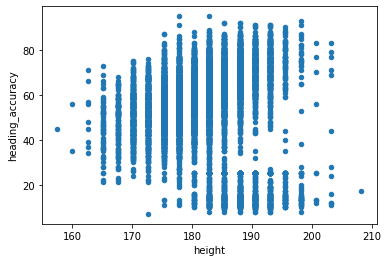

In [142]:
df_recent_player_rating.plot(x='height', y='heading_accuracy', kind='scatter')


In [143]:
#

<AxesSubplot:xlabel='jumping', ylabel='heading_accuracy'>

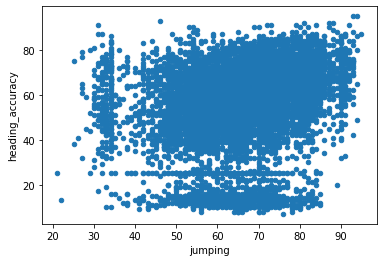

In [144]:
df_recent_player_rating.plot(x='jumping', y='heading_accuracy', kind='scatter')


In [145]:
#

<AxesSubplot:xlabel='strength', ylabel='shot_power'>

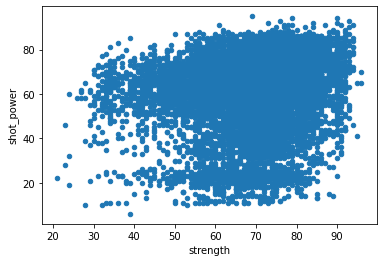

In [146]:
df_recent_player_rating.plot(x='strength', y='shot_power', kind='scatter')

In [147]:
#

<AxesSubplot:xlabel='agility', ylabel='dribbling'>

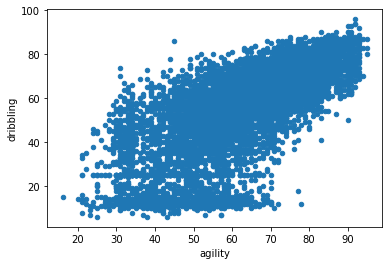

In [148]:
df_recent_player_rating.plot(x='agility', y='dribbling', kind='scatter')


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [149]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1